In [9]:
import matplotlib.pyplot as plt
import random as random
from math import dist
from collections import Counter

def generate_data_from_file():
    file_path = "C:\\Users\\NedyaIbrahim-AI23GBG\\Documents\\Github\\Python-Nedya-Ibrahim\\data\\datapoints.txt"
    """
    Read and process data from datapoint.txt.
    """

    data = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}

    with open(file_path, "r") as file_r:
        rows = file_r.readlines()[1:]  # Läs alla rader i filen och hoppa över den första raden

        for row in rows:
            elements = row.strip("\n").split(", ")
            width, height, label = map(float, elements)  # Konvertera elementen till flyttal

            if label == 1:
                data["pikachu"]["width"].append(width)
                data["pikachu"]["height"].append(height)
            else:
                data["pichu"]["width"].append(width)
                data["pichu"]["height"].append(height)

    return data

def generate_testdata_from_file():
    file_path = "C:\\Users\\NedyaIbrahim-AI23GBG\\Documents\\Github\\Python-Nedya-Ibrahim\\data\\testpoints.txt"
    """
    Read and process testpoints from testpoints.txt.
    """
    test_data = {"undefined": {"width": [], "height": []}}

    with open(file_path, "r") as file_r:
        rows = file_r.readlines()[1:]  # Läs alla rader i filen och hoppa över den första raden

        for row in rows:
            elements = row[4:-2].split(", ")
            width, height = map(float, elements)  # Konvertera elementen till flyttal
            test_data["undefined"]["width"].append(width)
            test_data["undefined"]["height"].append(height)

    return test_data



In [10]:
   
"""
    Create scatterplots of data and optionally test data and incorrect predictions.
    """

def plot_data(data, test_data=None, incorrect_predictions=None):
    datasets = [
        (data["pikachu"], "blue", "Pikachus"),
        (data["pichu"], "red", "Pichus")
    ]

    if test_data:
        for category, color in [("undefined", "green"), ("pikachu", "blue"), ("pichu", "green")]:
            category_data = test_data.get(category)
            if category_data:
                datasets.append((category_data, color, f"Undefined ({category.capitalize()})"))

    if incorrect_predictions:
        for category, color in [("pikachu", "yellow"), ("pichu", "orange")]:
            category_data = incorrect_predictions.get(category)
            if category_data:
                datasets.append((category_data, color, f"Incorrect (actual {category.capitalize()})"))

    for dataset, color, label in datasets:
        plt.scatter(dataset["width"], dataset["height"], color=color, label=label)

    plt.title("Scatterplot of width/height measurements of Pokemon")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.legend()

In [11]:
#Format and handle user input
def clean_user_input():
    while True:
        user_input = input("Enter a manual point to categorize, formatted like 'width, height' (x, y):\n(Optionally enter a third number for amount of votes, default: 1)")
        
        user_input = user_input.split(",")
        if len(user_input) < 2 or len(user_input) > 3:
            print("Invalid input. Please enter 2-3 positive numbers separated by commas.")
            continue
        
        try:
            width = float(user_input[0].strip())
            height = float(user_input[1].strip())
            amount_votes = int(user_input[2].strip()) if len(user_input) == 3 else 1

            if width <= 0 or height <= 0 or amount_votes <= 0:
                print("Invalid input. Please enter positive numbers only.")
                continue

            return width, height, amount_votes

        except ValueError as err:
            print("Invalid input. Please enter 2-3 valid positive numbers.")

In [13]:
    

def categorize_point(point, data, amount_votes=1):
    distances = []
    
    """Categorize a point (x, y) based on its proximity to data points.
    Return the category (str) and certainty (float) of the categorization.
    """

    for category in ["pikachu", "pichu"]:
        width_values = data[category]["width"]
        height_values = data[category]["height"]
        
        category_distances = [dist((w, h), (point[0], point[1])) for w, h in zip(width_values, height_values)]
        distances.extend([(dist, category) for dist in category_distances])
    
    distances.sort(key=lambda x: x[0])
    distances = distances[:amount_votes]
    
    category_votes = [category for _, category in distances]
    vote_counts = Counter(category_votes)
    
    most_common_category, votes = vote_counts.most_common(1)[0]
    
    certainty = votes / amount_votes
    return most_common_category, certainty

In [14]:
"""
    Split the data into test and training datasets randomly.
    Return test_data and training_data dictionaries.
    """

def generate_test_training_data(data):
    test_data = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}
    training_data = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}

    all_indices = list(range(75))

    random_point_pikachu = random.sample(all_indices, 25)

    for category in ["pikachu", "pichu"]:
        test_indices = random.sample(random_point_pikachu, 25)
        training_indices = [i for i in all_indices if i not in test_indices]

        test_data[category]["width"] = [data[category]["width"][i] for i in test_indices]
        test_data[category]["height"] = [data[category]["height"][i] for i in test_indices]

        training_data[category]["width"] = [data[category]["width"][i] for i in training_indices]
        training_data[category]["height"] = [data[category]["height"][i] for i in training_indices]

    return test_data, training_data

In [15]:
def calculate_accuracy(test_data, data, amount_votes=1):
    incorrect_predictions = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}
    correct_predictions = {"pikachu": 0, "pichu": 0}

    for category in ["pikachu", "pichu"]:
        width_values = test_data[category]["width"]
        height_values = test_data[category]["height"]

        for i in range(len(width_values)):
            result, _ = categorize_point([width_values[i], height_values[i]], data, amount_votes)

            if result == category:
                correct_predictions[category] += 1
            else:
                incorrect_predictions[category]["width"].append(width_values[i])
                incorrect_predictions[category]["height"].append(height_values[i])

    TP = correct_predictions["pikachu"]
    TN = correct_predictions["pichu"]
    FP = len(incorrect_predictions["pichu"]["width"])
    FN = len(incorrect_predictions["pikachu"]["width"])

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return accuracy, TP, TN, FP, FN, incorrect_predictions

**Datafiles working with**


In [16]:
# Read in datapoints file and store as data
data = generate_data_from_file() 
# Read in testpoints file and store as test_data
test_data = generate_testdata_from_file() 

**Plota data and testpoints**

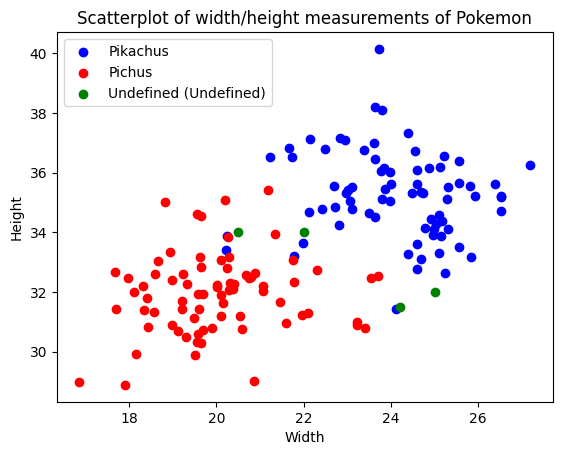

In [17]:
data = generate_data_from_file()  # Read in datapoints file and store as data
test_data = generate_testdata_from_file()  # Read in testpoints file and store as test_data
plot_data(data, test_data)  # Plot data and test data points

**Determine the distance between a test point and a training point**

In [18]:
"""Majority vote of 1"""
data = generate_data_from_file()
test_data = generate_testdata_from_file()
amount_votes = 1 #number of nearest points to consider for majority vote

for i in range(len(test_data["undefined"]["width"])):
    width = test_data["undefined"]["width"][i]
    height = test_data["undefined"]["height"][i]
    result, certainty = categorize_point([width, height], data, amount_votes)

    print(f"Point ({width}, {height}) calculated as \"{result.capitalize()}\"")
    print(f"({certainty * 100:.1f}% certainty based on a majority vote of {amount_votes})\n")

Point (25.0, 32.0) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (24.2, 31.5) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (22.0, 34.0) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (20.5, 34.0) calculated as "Pichu"
(100.0% certainty based on a majority vote of 1)



In [19]:
"""Majority vote of 10"""
data = generate_data_from_file()
test_data = generate_testdata_from_file()
amount_votes = 10 #number of nearest points to consider for majority vote

for i in range(len(test_data["undefined"]["width"])):
    width = test_data["undefined"]["width"][i]
    height = test_data["undefined"]["height"][i]
    result, certainty = categorize_point([width, height], data, amount_votes)

    print(f"Point (width, height): ({width}, {height}) classified as {result.capitalize()}")
    print(f"({certainty * 100:.1f}% certainty based on a majority vote of {amount_votes})\n")

Point (width, height): (25.0, 32.0) classified as Pikachu
(80.0% certainty based on a majority vote of 10)

Point (width, height): (24.2, 31.5) classified as Pikachu
(50.0% certainty based on a majority vote of 10)

Point (width, height): (22.0, 34.0) classified as Pikachu
(70.0% certainty based on a majority vote of 10)

Point (width, height): (20.5, 34.0) classified as Pichu
(80.0% certainty based on a majority vote of 10)



**Input a point for categorization manually**

In [20]:
data = generate_data_from_file() 

user_input = clean_user_input()
result = categorize_point([user_input[0], user_input[1]], data, user_input[2]) 

print(f"Width, height ({width}, {height}) calculated as '{result}' with {certainty * 100:.1f}% certainty based on {amount_votes} votes")

Width, height (20.5, 34.0) calculated as '('pichu', 1.0)' with 80.0% certainty based on 10 votes


**Randomly divide the initial dataset into separate test and training datasets**
- Calculate the accuracy of predicted categories
- Plot a graph of test and training points

Accuracy of categorization: 94.0%
Correct predictions: Pikachu 23/24, Pichu 24/26 (based on a majority vote of 10)


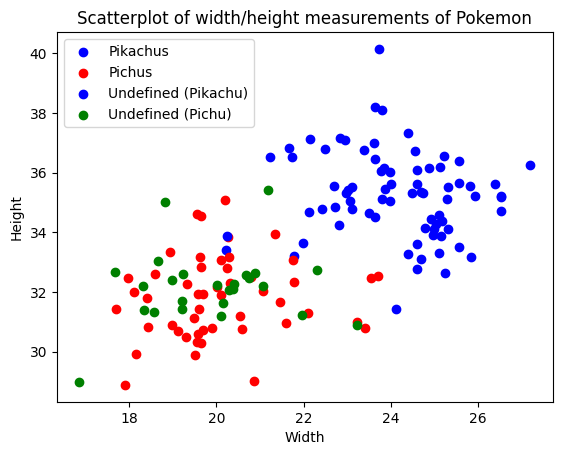

In [21]:
data = generate_data_from_file() 
test_data, training_data = generate_test_training_data(data) 
amount_votes = 10 

plot_data(training_data, test_data) 


accuracy, TP, TN, FP, FN, incorrect_predictions = calculate_accuracy(test_data, training_data, amount_votes)

print(f"Accuracy of categorization: {accuracy * 100:.1f}%") 
print(f"Correct predictions: Pikachu {TP}/{TP + FP}, Pichu {TN}/{TN + FN} (based on a majority vote of {amount_votes})")

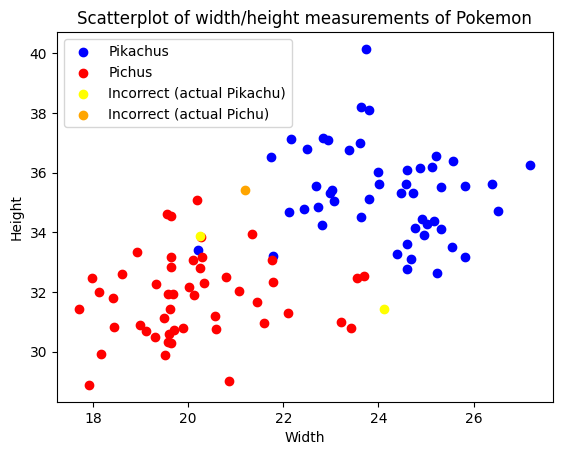

In [22]:
plot_data(training_data, incorrect_predictions = incorrect_predictions) 

**Visualize the accuracy of multiple test and training dataset pairs**
- Randomly partition the dataset into test and training data.
- Assess the accuracy of categorizing the test data when compared to the training data.
- Generate a graphical representation of the calculated accuracy.
- Compute the average accuracy across multiple simulation sets.

Prediction accuracy of simulation 1: 90.0% - Correct predictions: Pikachu 21/22, Pichu 24/28
Prediction accuracy of simulation 2: 96.0% - Correct predictions: Pikachu 25/27, Pichu 23/23
Prediction accuracy of simulation 3: 94.0% - Correct predictions: Pikachu 23/24, Pichu 24/26
Prediction accuracy of simulation 4: 96.0% - Correct predictions: Pikachu 23/23, Pichu 25/27
Prediction accuracy of simulation 5: 100.0% - Correct predictions: Pikachu 25/25, Pichu 25/25
Prediction accuracy of simulation 6: 98.0% - Correct predictions: Pikachu 24/24, Pichu 25/26
Prediction accuracy of simulation 7: 90.0% - Correct predictions: Pikachu 21/22, Pichu 24/28
Prediction accuracy of simulation 8: 98.0% - Correct predictions: Pikachu 25/26, Pichu 24/24
Prediction accuracy of simulation 9: 94.0% - Correct predictions: Pikachu 22/22, Pichu 25/28
Prediction accuracy of simulation 10: 92.0% - Correct predictions: Pikachu 23/25, Pichu 23/25

Average accuracy of all 10 simulations: 94.8%


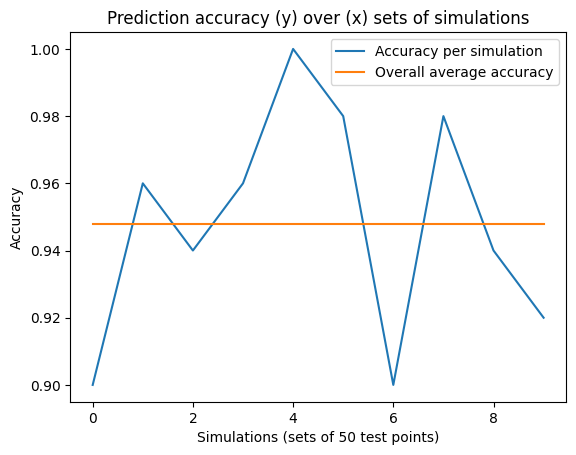

In [26]:
amount_simulations = 10 # amount of simulations sets to run
amount_votes = 10 # amount of closest points to consider for majority vote
accuracy_list = [] # stores accuracy results from each simulation set


for i in range(amount_simulations):
    data = generate_data_from_file() # read in datapoints file and store as data
    test_data, training_data = generate_test_training_data(data) # split datapoints in data randomly into 2 groups; test and training data

    # categorize points of test data compared to training data, and calculate accuracy of predictions
    accuracy, TP, TN, FP, FN, incorrect_predictions = calculate_accuracy(test_data, training_data, amount_votes)
    accuracy_list.append(accuracy) # append accuracy results to list
    
    # print results of current simulation
    print(f"Prediction accuracy of simulation {i + 1}: {accuracy * 100:.1f}% - Correct predictions: Pikachu {TP}/{TP + FP}, Pichu {TN}/{TN + FN}")

average_accuracy = sum(accuracy_list) / len(accuracy_list) # calculate average accuracy (across all sets of simulations)

# plot results:
plt.plot(accuracy_list, label = "Accuracy per simulation")
plt.plot(range(amount_simulations), [average_accuracy for i in range(amount_simulations)], label = "Overall average accuracy")
plt.title("Prediction accuracy (y) over (x) sets of simulations")
plt.xlabel("Simulations (sets of 50 test points)")
plt.ylabel("Accuracy")
plt.legend()

print(f"\nAverage accuracy of all {amount_simulations} simulations: {average_accuracy * 100:.1f}%")